In [1]:
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
from pathlib import Path

import seaborn as sns
from keras import Sequential
from matplotlib.pyplot import figure
import pandas as pd
import glob

from sklearn.model_selection import train_test_split
from tensorflow.python.keras.saving.saved_model_experimental import sequential

Laden  Sie den Datensatz „rawdata_luftqualitaet.csv“ in einen DataFrame. Skalieren Sie die Daten mit dem StandardScaler. Trennen Sie die
Daten in einen Lern- und Testdatensatz zur Klasssifikation des Labels “state_air_quality“ mit den 3 Klassen 0, 1 und 2. Nutzen Sie alle 5
Merkmale 'humidity_inside','temperature_inside','co2_inside','temperature_heater‘ und 'temperature_wall_inside‘ im Training.
a) Erstellen Sie ein sequentielles Modell in Keras mit 2 Dense Layers mit jeweils 60 Neuronen. (1P)
b) Trainieren Sie das Modell mit mind. 200 Epochen und visualisieren Sie den Anlernprozess mit „Overfitting“ ähnlich wie unten in der

In [2]:
df = pd.read_csv("rawdata_luftqualitaet.csv")
df.tail()

,humidity_inside,temperature_inside,co2_inside,temperature_heater,temperature_wall_inside,state_air_quality
911,37.92,21.714,891,24.312,8.937,1
912,37.89,23.263,1165,52.250,10.062,1
913,39.82,23.043,1348,48.812,10.000,1
914,39.76,23.508,1470,51.375,10.312,1
915,40.54,23.812,1701,51.562,10.625,1


In [3]:

from keras import layers
import keras
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features = ['humidity_inside', 'temperature_inside', 'co2_inside', 'temperature_heater', 'temperature_wall_inside']
X = df[features]
y = df['state_air_quality']

x_scaled = scaler.fit_transform(X)

features = pd.DataFrame(x_scaled, columns=features)

X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

features.head()


,humidity_inside,temperature_inside,co2_inside,temperature_heater,temperature_wall_inside
0,1.095303,-0.102155,0.461797,0.156128,1.111884
1,1.099779,-0.112450,0.482187,0.122250,1.111884
2,0.938643,0.171019,0.553551,0.046091,1.244219
3,1.098287,0.274661,1.019115,0.113848,1.332208
4,0.916263,0.282211,0.827112,0.105310,1.332208


In [4]:
features.shape

(916, 5)

In [5]:
from keras import regularizers

# === A ===

model = Sequential([
	layers.Input(shape=(5,)),
	layers.Dense(60,kernel_regularizer=regularizers.l2(0.01)),
	layers.Dense(60,kernel_regularizer=regularizers.l2(0.01)),
	layers.Dense(3)
])

In [6]:
from keras.src.callbacks import EarlyStopping

# == calback ==
early_stop = EarlyStopping(
	monitor='val_loss',
	patience=10,
	restore_best_weights=True,
	verbose=1
)

model.compile(
	optimizer='adam',
	loss='sparse_categorical_crossentropy',
	metrics=['accuracy']
)


In [7]:
history = model.fit(X_train,
					Y_train,
					epochs=200,
					batch_size=256,
					validation_data=(X_test,Y_test),
					callbacks=[early_stop])

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.4153 - loss: 7.8794 - val_accuracy: 0.4783 - val_loss: 7.3574
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5150 - loss: 6.2785 - val_accuracy: 0.5000 - val_loss: 6.3940
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5232 - loss: 5.6324 - val_accuracy: 0.4946 - val_loss: 5.5674
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5246 - loss: 4.5424 - val_accuracy: 0.5326 - val_loss: 4.5407
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5574 - loss: 3.6471 - val_accuracy: 0.5543 - val_loss: 3.3046
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6066 - loss: 2.9063 - val_accuracy: 0.6033 - val_loss: 2.6696
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6434 - loss: 2.3151 - val_accuracy: 0.6304 - val_loss: 2.3389
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6680 - loss: 1.9908 - val_accuracy: 0.6359 - val_loss:

In [8]:
plt.rcdefaults()
plt.style.use('bmh')
plt.rcParams.update({
	'figure.facecolor': 'white',  # Hintergrund des gesamten Bildes
	'axes.facecolor': '#f0f0f0',  # Hintergrund der Plot-Fläche (bmh typisch)
	'text.color': 'white',
	'savefig.facecolor': 'white',  # Beim Speichern weißer Hintergrund
	'axes.titleweight': 'bold',  # Titel immer fett
	'legend.frameon': True,  # Legende mit Rahmen
	'legend.facecolor': 'white'  # Legendenhintergrund weiß
})
sns.set_theme(style="whitegrid")


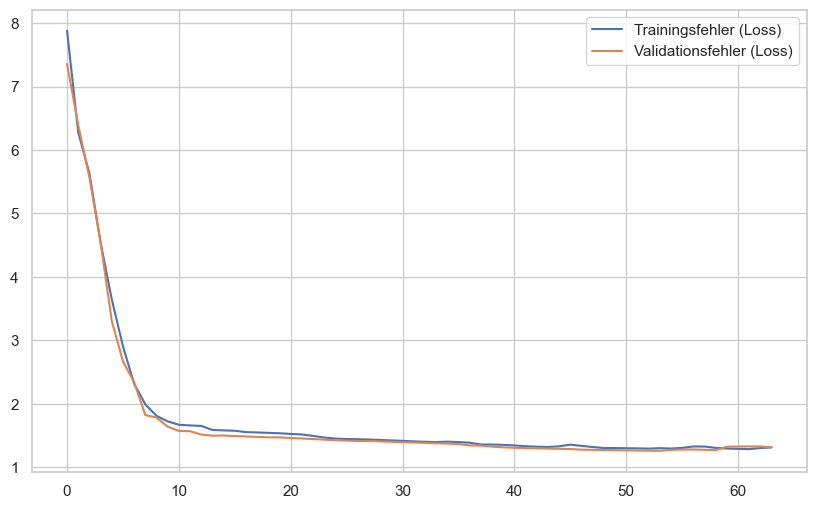

In [9]:
import matplotlib.pyplot as plt

# === B ===

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Trainingsfehler (Loss)')
plt.plot(history.history['val_loss'], label='Validationsfehler (Loss)')
plt.legend()
plt.show()

In [10]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f"Test-Genauigkeit: {test_acc:.2f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7120 - loss: 1.2594 
Test-Genauigkeit: 0.71


In [11]:
# === 2 ===